<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-engineering/blob/master/Unit%206%20Single-Phase-Fluid%20Flow%20in%20Porous%20Media/notebook/6_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unit 6 Single-Phase-Fluid Flow in Porous Media**

There are 6 simplified solutions:
* Constant-Rate:
  * Bounded Cylindrical Reservoir (Chap 6.3)
  * Infinite Cylindrical Reservoir with Line-Source Well (Chap 6.4)
  * Cylindrical Reservoir with Constant Pressure at Outer Boundary (Chap 6.5)
* Constant-Pressure:
  * Bounded Cylindrical Reservoir (Chap 6.6)
* Multirate (Chap 6.7)
* Multiple Pressure (Chap 6.8)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
!git clone https://www.github.com/yohanesnuwara/reservoir-engineering

Cloning into 'reservoir-engineering'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 387 (delta 8), reused 0 (delta 0), pack-reused 360
Receiving objects: 100% (387/387), 1.03 MiB | 17.66 MiB/s, done.
Resolving deltas: 100% (162/162), done.


# **Chap 6.3 Constant-Rate Solutions: Bounded Cylindrical Reservoir**

Function: `solution_type_1`

Boundary conditions:
* No flow at the outer boundary of reservoir (`r = re`)
* Constant flow rate at wellbore (`r = rw`)

Purpose: Calculate pressure INSIDE WELLBORE over TIME

# Example 6.1 Calculation of Wellbore Flowing Pressure

In [0]:
"Task 1. determine the condition when the well becomes FINITE ACTING"

# known
poro = 0.15
ct = 12E-06 # total compressibility, in psi^-1
k = 600 # in mD
rw = 4 # in inch, radius of wellbore
h = 32 # in ft
mu_oil = 2 # oil viscosity, in cP
pi = 2500 # initial pressure, in psia
re = 1000 # distance from centre of wellbore to outer boundary of reservoir, in ft
q = 1000 # oil flow rate, in STB/d
Bo = 1.333 # oil FVF, in RB/STB

# conversion
rw_conv = rw * 0.08333 # convert from in to ft

# condition for finite acting, Eq 6.13

r_eD = re / rw_conv
t_Dw = 0.25 * r_eD**2

# time at finite acting, re-arranging Eq 6.16 (all units already satisfy)
t_finite_acting = (poro * mu_oil * ct * (rw_conv**2) * t_Dw) / (0.0002637 * k) # result in hour
tsat = (t_Dw * poro * ct * (rw_conv**2))
print("The well becomes FINITE ACTING in and after:", t_finite_acting, "hours")

The well becomes FINITE ACTING in and after: 5.688282138794084 hours


In [0]:
"Task 2. calculate pressure at 1 and 48 hours"

time = np.array([1, 48]) # time 1 and time 2, in hour

def solution_type_1(time, poro, ct, k, rw, h, mu_oil, pi, re, q, Bo):

  r_eD = re / rw_conv
  t_Dw = 0.25 * r_eD**2
  t_finite_acting = (poro * mu_oil * ct * (rw_conv**2) * t_Dw) / (0.0002637 * k) # result in hour

  P_wellbore_array = []

  for i in range(len(time)):
    if time[i] < t_finite_acting:
      # time is in INFINITE ACTING CONDITION
      t_status = "infinite"

      # criteria to determine whether using Eq 6.20 (Lee simplification of Eq 6.17's using Bessel function) is valid
      T_Dw = (0.000263 * k * time[i]) / (poro * mu_oil * ct * (rw_conv**2))

      if T_Dw > 100:
        P_D = 0.5 * (((np.log(T_Dw)) + 0.80907)) # Eq 6.20

        # re-arranging Eq 6.15 to calculate P_wellbore
        P_wellbore = pi - ((P_D * q * Bo * mu_oil) / (0.007082 * k * h))
        P_wellbore_array.append(float(P_wellbore))

      if T_Dw < 100:
        P_wellbore = "NaN"
        P_wellbore_array.append(float(P_wellbore))

    elif time[i] >= t_finite_acting:
      # time is in FINITE ACTING CONDITION
      t_status = "finite"

      # criteria to determine whether using Eq 6.19 (Lee simplification of Eq 6.17's using Bessel function) is valid
      T_Dw = (0.000263 * k * time[i]) / (poro * mu_oil * ct * (rw_conv**2))

      if T_Dw > 25:
        P_D = (2 * T_Dw / (r_eD**2)) + np.log(r_eD) - 0.75 # Eq 6.19
        
        # re-arranging Eq 6.15 to calculate P_wellbore
        P_wellbore = pi - ((P_D * q * Bo * mu_oil) / (0.007082 * k * h))
        
        P_wellbore_array.append(float(P_wellbore))

      if T_Dw < 25:
        P_wellbore = "NaN"
        P_wellbore_array.append(float(P_wellbore))

  return(P_wellbore_array)

P_wellbore = solution_type_1(time, poro, ct, k, rw_conv, h, mu_oil, pi, re, q, Bo)
print("Pressure in the wellbore in", time[0], "hour:", P_wellbore[0], "psia")
print("Pressure in the wellbore in", time[1], "hour:", P_wellbore[1], "psia")

Pressure in the wellbore in 1 hour: 2365.7482507514856 psia
Pressure in the wellbore in 48 hour: 2275.2215815808827 psia


# Problem 6.2

In [0]:
"Task. calculate wellbore flowing pressure from 0 to 1 hour by 0.1 hour increment, then to 48 hours by 1 hour increment"

time_part1 = np.arange(0, 1, 0.1)
time_part2 = np.arange(1, 49, 1)
time = np.append(time_part1, time_part2) # append part 1 and part 2 of time

def solution_type_1(time, poro, ct, k, rw, h, mu_oil, pi, re, q, Bo):
  # rw_conv = rw * 0.08333 # from in to ft 
  r_eD = re / rw_conv
  t_Dw = 0.25 * r_eD**2
  t_finite_acting = (poro * mu_oil * ct * (rw_conv**2) * t_Dw) / (0.0002637 * k) # result in hour

  t_status_array = [] # finite or infinite
  P_wellbore_array = []
  T_Dw_array = []
  P_D_array = []
  equation_array = []

  for i in range(len(time)):

    if time[i] == time[0]:

      # at initial time, time is in INFINITE ACTING condition
      t_status = "infinite"
      t_status_array.append(t_status)

      # because initial time < t_finite_acting, equation used is automatically Eq 6.20
      eq = "6.20"
      equation_array.append(eq)

      T_Dw = (0.000263 * k * time[i]) / (poro * mu_oil * ct * (rw_conv**2))
      T_Dw_array.append(float(T_Dw))

      P_D = "NaN"
      P_D_array.append(float(P_D))

      P_wellbore = pi
      P_wellbore_array.append(float(P_wellbore))

    if time[i] != time[0]:
      if time[i] < t_finite_acting:
        # time is in INFINITE ACTING CONDITION
        t_status = "infinite"
        t_status_array.append(t_status)

        # criteria to determine whether using Eq 6.20 (Lee simplification of Eq 6.17's using Bessel function) is valid

        eq = "6.20"
        equation_array.append(eq)

        T_Dw = (0.000263 * k * time[i]) / (poro * mu_oil * ct * (rw_conv**2))
        T_Dw_array.append(float(T_Dw))

        if T_Dw > 100:
          P_D = 0.5 * (((np.log(T_Dw)) + 0.80907)) # Eq 6.20
          P_D_array.append(float(P_D))

          # re-arranging Eq 6.15 to calculate P_wellbore
          P_wellbore = pi - ((P_D * q * Bo * mu_oil) / (0.007082 * k * h))
          P_wellbore_array.append(float(P_wellbore))

        if T_Dw < 100:
          P_D = "NaN"
          P_D_array.append(float(P_D))

          P_wellbore = "NaN"
          P_wellbore_array.append(float(P_wellbore))

      elif time[i] >= t_finite_acting:
        # time is in FINITE ACTING CONDITION
        t_status = "finite"
        t_status_array.append(t_status)

        # criteria to determine whether using Eq 6.19 (Lee simplification of Eq 6.17's using Bessel function) is valid

        eq = "6.19"
        equation_array.append(eq)

        T_Dw = (0.000263 * k * time[i]) / (poro * mu_oil * ct * (rw_conv**2))
        T_Dw_array.append(float(T_Dw))

        if T_Dw > 25:
          P_D = (2 * T_Dw / (r_eD**2)) + np.log(r_eD) - 0.75 # Eq 6.19
          P_D_array.append(float(P_D))
          
          # re-arranging Eq 6.15 to calculate P_wellbore
          P_wellbore = pi - ((P_D * q * Bo * mu_oil) / (0.007082 * k * h))
          
          P_wellbore_array.append(float(P_wellbore))

        if T_Dw < 25:
          P_D = "NaN"
          P_D_array.append(float(P_D))

          P_wellbore = "NaN"
          P_wellbore_array.append(float(P_wellbore))

  return(t_status_array, P_wellbore_array, T_Dw_array, P_D_array, equation_array, t_finite_acting) # T_Dw_array, P_D_array, equation_array are not necessary. P_wellbore is the result.

t_status, P_wellbore, T_Dw, P_D, equation, t_finite_acting = solution_type_1(time, poro, ct, k, rw_conv, h, mu_oil, pi, re, q, Bo)

df = pd.DataFrame({"time(hours)": time, "Status": t_status, "t_Dw": T_Dw, "P_D": P_D, "Wellbore_pressure(psia)": P_wellbore, "Equation": equation})
df

,time(hours),Status,t_Dw,P_D,Wellbore_pressure(psia),Equation
0,0.0,infinite,0.000000e+00,NaN,2500.000000,6.20
1,0.1,infinite,3.945316e+04,5.695970,2388.321220,6.20
2,0.2,infinite,7.890631e+04,6.042543,2381.526079,6.20
3,0.3,infinite,1.183595e+05,6.245276,2377.551177,6.20
4,0.4,infinite,1.578126e+05,6.389117,2374.730938,6.20
5,0.5,infinite,1.972658e+05,6.500689,2372.543392,6.20
6,0.6,infinite,2.367189e+05,6.591849,2370.756036,6.20
7,0.7,infinite,2.761721e+05,6.668925,2369.244848,6.20
8,0.8,infinite,3.156252e+05,6.735690,2367.935797,6.20
9,0.9,infinite,3.550784e+05,6.794582,2366.781133,6.20


As you can see that when time 6 hour and upward, the well becomes FINITE ACTING, because > 5.68 hour, which is time when FINITE ACTING.

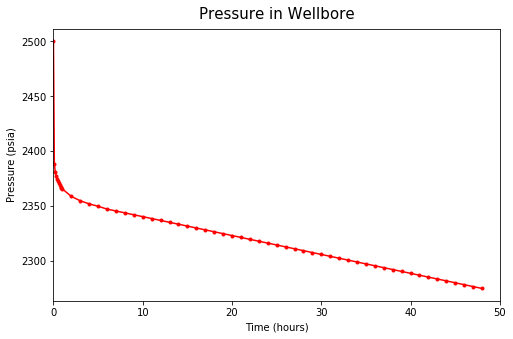

In [0]:
plt.figure(figsize=(8, 5))
plt.title("Pressure in Wellbore", pad=10, size=15)
plt.xlim(0, 50)
plt.xlabel("Time (hours)"); plt.ylabel("Pressure (psia)")
plt.plot(time, P_wellbore, '.-', color='red')

# **Chap 6.4 Constant-Rate Solutions: Infinite Cylindrical Reservoir with Line-Source Well**

Infinite reservoir assumption is **valid** when `t_Dw < 0.25*(r_eD^2)`, or `time < t_infinite_acting`, the infinite-acting condition. Line-source well assumption is **valid** when `t_Dw > 100`. So, **criteria** for this solution to be valid is: `100 < t_Dw < 0.25*(r_eD^2)`.

Function: `solution_type_2`

Boundary conditions:
* Pressure at the infinite distance from wellbore equals to initial pressure (`p = pi` at `r = infinity`)

Purpose: Calculate distribution of pressure INSIDE RESERVOIR over DISTANCE

# Example 6.3 Calculation of Flowing Pressure Distribution in a Reservoir

In [3]:
# known

poro = 0.175
k = 0.12 # in micro.m2
h = 10 # in m
mu_oil = 2.5 # in cP
rw = 8 # in cm 
pi = 7900 # in kPa
re = 1000 # in m
ct = 2E-06 # in kPa^-1
q = 40 # in std m3/d
Bo = 1.405 # in res m3/std m3

# conversion

k = k / 9.869233E-4 # 1 mD = 9.869233E-4 micro.m2
h = h / 3.048E-01 # 1 m = 3.048E-01 ft 
rw = rw / (1E+02 * 3.048E-01) # from cm to ft
pi = pi / 6.894757 # 1 psi = 6.894757 kPa
re = re / 3.048E-01 # 1 m = 3.048E-01 ft 
ct = ct / (1 / 6.894757) # from kPa^-1 to psi^-1
q = q / (1.589873E-01) # from m3 to barrel 

time = 24 # time (hour) when pressure distribution in the reservoir will be assessed

# print(k, h, mu_oil, rw, pi, re, ct, q, Bo)

r_eD = re / rw
t_Dw = 0.25 * r_eD**2
t_finite_acting = (poro * mu_oil * ct * (rw**2) * t_Dw) / (0.0002637 * k) # result in hour
print("Finite acting in:", t_finite_acting, "hours")

# check validity of applying this solution
if time < t_finite_acting:
  print("Infinite Cylindrical Reservoir with Line-Source Well Solution Method is VALID to be used")
if time >= t_finite_acting:
  print("Infinite Cylindrical Reservoir with Line-Source Well Solution Method is NOT VALID to be used")

Finite acting in: 506.3247153011776 hours
Infinite Cylindrical Reservoir with Line-Source Well Solution Method is VALID to be used


In [42]:
import pandas as pd

distance = np.arange(1, 1001, 1)
distance_conv = distance / 3.048E-01 # convert distance from m to ft

x_arr = []
eq_arr = []
t_D_arr = []
p_D_arr = []

# accessing Table A-1 in Appendix A to solve the -Ei(-x) for Eq 6.28
Ei_table = pd.read_csv('/content/reservoir-engineering/Appendix A. Values and Tabulations/Table A-1-Values for Exponential Integral.csv', names=["x", "value"], header=None)

for i in range(len(distance_conv)):

  t_D = (0.0002637 * k * time) / (poro * mu_oil * ct * (distance_conv[i]**2))
  r_D = distance_conv[i] / rw
  t_D_arr.append(float(t_D))

  if t_D > 12.5:
    # p_D can be approximated using Eq 6.28
    p_D = 0.5 * (np.log(t_D) + 0.80907)
    eq = "6.28"
    eq_arr.append(eq)
    p_D_arr.append(float(p_D))

  if t_D < 12.5:
    # use Eq 6.26 and find the value of integral exponent function -Ei(-x) using tabulation 
    eq = "6.26"
    eq_arr.append(eq)    

    # import pandas as pd
    # Ei_table = pd.read_csv('/content/reservoir-engineering/Appendix A. Values and Tabulations/Table A-1-Values for Exponential Integral.csv', names=["x", "value"], header=None)
    
    x = 0.25 * (1 / (4 * t_D))

    if x >= 0 and x <= 0.209:
      x_new = round(x, 3)

    if x > 0.209 and x <= 2.09:
      x_new = round(x, 2) 

    if x > 2.09:
      x_new = round(x, 1) 

    value_pd = Ei_table.loc[Ei_table['x'] == 5] ##### bukan 5
    p_D = 0.5 * np.array(value_pd.value)
    p_D_arr.append(float(p_D))

pd = pd.DataFrame({"Distance_in_m": distance, "t_D": t_D_arr, "p_D": p_D_arr, "Equation": eq_arr})
print(pd.Distance_in_m[39])
print(pd.Equation[39])
print(pd.p_D[39]) ##### masih salah

40
6.26
0.000575


In [69]:
##### TEST

distance = np.arange(40, 1001, 1)
distance_conv = distance / 3.048E-01 # convert distance from m to ft

eq_arr = []
p_D_arr = []

x_arr = []

for i in range(len(distance_conv)):
  t_D = (0.0002637 * k * time) / (poro * mu_oil * ct * (distance_conv[i]**2))
  r_D = distance_conv[i] / rw
  
  if t_D > 12.5:
    # p_D can be approximated using Eq 6.28
    eq = "6.28"
    eq_arr.append(eq)

    p_D = 0.5 * (np.log(t_D) + 0.80907)
    p_D_arr.append(float(p_D))

  if t_D < 12.5:
    # p_D calculated using Eq 6.26. Find the value of integral exponent function -Ei(-x) using tabulation 
    eq = "6.26"
    eq_arr.append(eq)    

    x = 0.25 * (1 / (4 * t_D))

    if x >= 0 and x <= 0.209:
      x_new = round(x, 3)
      # value_Ei = Ei_table.loc[Ei_table['x'] == x_new]

    if x > 0.209 and x <= 2.09:
      x_new = round(x, 2) 
      # value_Ei = Ei_table.loc[Ei_table['x'] == x_new]

    if x > 2.09:
      x_new = round(x, 1) 
      # value_Ei = Ei_table.loc[Ei_table['x'] == x_new]
    
    # value_Ei = Ei_table.loc[Ei_table['x'] == x_new]
    # value_Eii = value_Ei.value
    # value_Eif = np.array(value_Ei.value)
    # print(value_Eii)
    # p_D = 0.5 * np.array(value_Ei.value)
    # p_D_arr.append(float(p_D))   
    x_arr.append(float(x_new))

print(x_arr)


# x = 0.25 * (1 / (4 * t_D))

# value_pd = Ei_table.loc[Ei_table['x'] == x_new]
# p_D = 0.5 * np.array(value_pd.value)

[0.008, 0.009, 0.009, 0.01, 0.01, 0.011, 0.011, 0.012, 0.012, 0.013, 0.013, 0.014, 0.014, 0.015, 0.015, 0.016, 0.017, 0.017, 0.018, 0.018, 0.019, 0.02, 0.02, 0.021, 0.022, 0.022, 0.023, 0.024, 0.024, 0.025, 0.026, 0.027, 0.027, 0.028, 0.029, 0.03, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05, 0.051, 0.052, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.069, 0.07, 0.071, 0.072, 0.073, 0.075, 0.076, 0.077, 0.079, 0.08, 0.081, 0.082, 0.084, 0.085, 0.086, 0.088, 0.089, 0.091, 0.092, 0.093, 0.095, 0.096, 0.098, 0.099, 0.1, 0.102, 0.103, 0.105, 0.106, 0.108, 0.109, 0.111, 0.112, 0.114, 0.116, 0.117, 0.119, 0.12, 0.122, 0.123, 0.125, 0.127, 0.128, 0.13, 0.132, 0.133, 0.135, 0.137, 0.138, 0.14, 0.142, 0.144, 0.145, 0.147, 0.149, 0.151, 0.152, 0.154, 0.156, 0.158, 0.16, 0.162, 0.163, 0.165, 0.167, 0.169, 0.171, 0.173, 0.175, 0.177, 0.179, 0

In [0]:
plt.figure(figsize=(20, 10))
plt.plot(Ei_table.x, Ei_table.value)

# ***

In [0]:
x = [0.123, 0.897, 0.67, 0.208223, 2.3538, 6.745]

# value finder for Table A-1

x_arr = []
for i in range(len(x)):
  if x[i] >= 0 and x[i] <= 0.209:
    x_new = round(x[i], 3)

  if x[i] > 0.209 and x[i] <= 2.09:
    x_new = round(x[i], 2) 

  if x[i] > 2.09:
    x_new = round(x[i], 1) 
  
  x_arr.append(float(x_new))  
print(x_arr)
  

# answer = 0.04544565566
# answer = round(answer, 3)
# answer

[0.123, 0.9, 0.67, 0.208, 2.4, 6.7]


In [0]:
import pandas as pd
a = np.array([1, 2, 3, 4, 5])
b = np.array([3, 4, 5, 6, 7])

fff = pd.DataFrame({"a": a, "b": b})

xxx = fff.loc[fff['a'] == 5]
xxx = np.array(xxx.b)
xxx

array([7])

In [0]:
a = [1, 2, 3, 4]
b_arr = []

for i in range(len(a)):
  if a[i] !=4:
    b = 10
    b_arr.append(b)
  if a[i] ==4:
    b = 20
    b_arr.append(b) 
b_arr
  

[10, 10, 10, 20]

In [0]:
T_Dw = 395550 * 48
# p_well = 0.5 * (((np.log(T_Dw)) + 0.80907))
p_well = (2 * T_Dw / (r_eD**2)) + np.log(r_eD) - 0.75
print(p_well)

11.47527003920099


In [0]:
time = 1
T_Dw = (0.000263 * k * time) / (poro * mu_oil * ct * (rw_conv**2))
T_Dw

394531.561893701

In [0]:
a = ["infinite", "finite", "infinite", "finite"]
b = [1, 2, 3, 4]
c = pd.DataFrame({"time": b, "note": a})
c

,time,note
0,1,infinite
1,2,finite
2,3,infinite
3,4,finite
